<a href="https://colab.research.google.com/github/R-Madhuram/NLP_Humor_Detection/blob/main/try_it_18_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Comparing Models and Vectorization Strategies for Text Classification

This try-it focuses on weighing the positives and negatives of different estimators and vectorization strategies for a text classification problem.  In order to consider each of these components, you should make use of the `Pipeline` and `GridSearchCV` objects in scikitlearn to try different combinations of vectorizers with different estimators.  For each of these, you also want to use the `.cv_results_` to examine the time for the estimator to fit the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### The Data

The dataset below is from [kaggle]() and contains a dataset named the "ColBert Dataset" created for this [paper](https://arxiv.org/pdf/2004.12765.pdf).  You are to use the text column to classify whether or not the text was humorous.  It is loaded and displayed below.

**Note:** The original dataset contains 200K rows of data. It is best to try to use the full dtaset. If the original dataset is too large for your computer, please use the 'dataset-minimal.csv', which has been reduced to 100K.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/M18 NLP-TIA/text_data/dataset.csv')

In [ ]:
df.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


#### Task


**Text preprocessing:** As a pre-processing step, perform both `stemming` and `lemmatizing` to normalize your text before classifying. For each technique use both the `CountVectorize`r and `TfidifVectorizer` and use options for stop words and max features to prepare the text data for your estimator.

**Classification:** Once you have prepared the text data with stemming lemmatizing techniques, consider `LogisticRegression`, `DecisionTreeClassifier`, and `MultinomialNB` as classification algorithms for the data. Compare their performance in terms of accuracy and speed.

Share the results of your best classifier in the form of a table with the best version of each estimator, a dictionary of the best parameters and the best score.

In [ ]:
pd.DataFrame({'model': ['Logistic', 'Decision Tree', 'Bayes'],
             'best_params': ['', '', ''],
             'best_score': ['', '', '']}).set_index('model')

,best_params,best_score
model,,
Logistic,,
Decision Tree,,
Bayes,,


### Understanding the data



#### Balanced or unbalanced data?

In [ ]:
# Number of observation of 'False' label
labels_true = df.loc[df['humor']==True]

labels_true

,text,humor
2,What do you call a turtle without its shell? d...,True
6,What is a pokemon master's favorite kind of pa...,True
7,Why do native americans hate it when it rains ...,True
9,"My family tree is a cactus, we're all pricks.",True
13,How are music and candy similar? we throw away...,True
...,...,...
199990,Where do eskimos keep their money? in snowbanks.,True
199993,What did the child with no arms get for christ...,True
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True


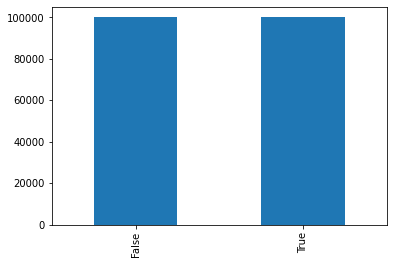

In [ ]:
# Bar-plot of the counts of humorous and non-humorous short text.

import matplotlib.pyplot as plt
df['humor'].value_counts().plot(kind='bar')

We have balanced data-set with equal number of observations representing the humor label 'True' and humor label 'False' i.e we have equal number of short-texts that have been labeled as humorous (100K) and not-humorous (100k).

#### Word cloud of humorous short text

In [ ]:
labels_true['text']

2         What do you call a turtle without its shell? d...
6         What is a pokemon master's favorite kind of pa...
7         Why do native americans hate it when it rains ...
9             My family tree is a cactus, we're all pricks.
13        How are music and candy similar? we throw away...
                                ...                        
199990     Where do eskimos keep their money? in snowbanks.
199993    What did the child with no arms get for christ...
199996    How to you make holy water? you boil the hell ...
199997    How many optometrists does it take to screw in...
199999    An irish man walks on the street and ignores a...
Name: text, Length: 100000, dtype: object

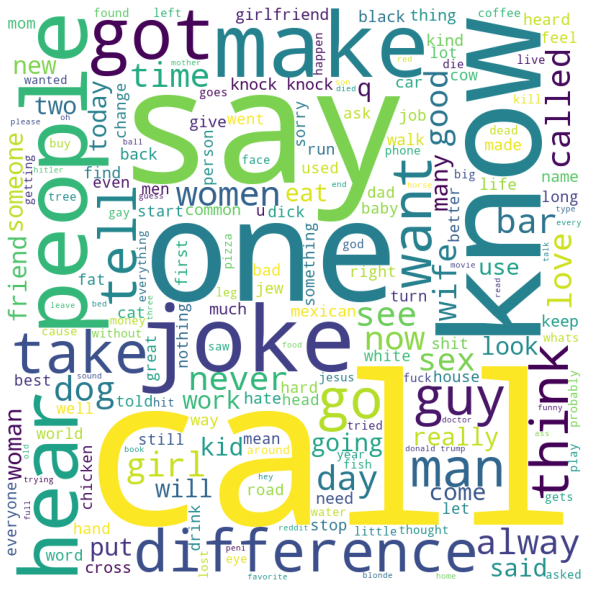

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

humor_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in labels_true['text']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    humor_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(humor_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


### Feature engineering


#### Label encoding the target variable

In [ ]:
# label encoding the 'humor' feature (False --> 0, True--> 1)

from sklearn import preprocessing
DF = df
le = preprocessing.LabelEncoder()
DF.loc[:,'humor'] = le.fit_transform(DF['humor'])

DF

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",0
1,Watch: darvish gave hitter whiplash with slow ...,0
2,What do you call a turtle without its shell? d...,1
3,5 reasons the 2016 election feels so personal,0
4,"Pasco police shot mexican migrant from behind,...",0
...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,0
199996,How to you make holy water? you boil the hell ...,1
199997,How many optometrists does it take to screw in...,1
199998,Mcdonald's will officially kick off all-day br...,0


### Train-Test Split the data

In [ ]:
# Train-test split the data to create training and tetsing set

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

X = df.drop(columns = ['humor'])
y = df['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [ ]:
X_train.head()

,text
162268,Watch this swimmer disappear into winter storm...
189138,"They laughed at reagan, too: trump's ideas wil..."
10349,"Hey, are you cold? go over to the corner, it's..."
192790,Can't get a standing desk? these are almost as...
146716,Wanna hear a joke about my penis? never mind i...


### Pre-processing the training set

In [ ]:
import nltk
import numpy as np


In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### 1. Tokenize training data

In [ ]:
# tokenize
import string
from nltk.tokenize import word_tokenize

X_train_tok = [nltk.word_tokenize(text) for text in X_train['text']]
X_train_tok[:4]

[['Watch', 'this', 'swimmer', 'disappear', 'into', 'winter', 'storm', 'jonas'],
 ['They',
  'laughed',
  'at',
  'reagan',
  ',',
  'too',
  ':',
  'trump',
  "'s",
  'ideas',
  'will',
  'outlast',
  'him',
  'on',
  'the',
  'political',
  'stage'],
 ['Hey',
  ',',
  'are',
  'you',
  'cold',
  '?',
  'go',
  'over',
  'to',
  'the',
  'corner',
  ',',
  'it',
  "'s",
  '90',
  'degress'],
 ['Ca',
  "n't",
  'get',
  'a',
  'standing',
  'desk',
  '?',
  'these',
  'are',
  'almost',
  'as',
  'good']]

##### Stemming and Lemmetization

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()

def stemWords(text):
  words = [stemmer.stem(word) for word in text]

  return " ".join(words)

X_train_tok_stemmed = list(map(stemWords, X_train_tok))
X_train_tok_stemmed[:5]

['watch thi swimmer disappear into winter storm jona',
 "they laugh at reagan , too : trump 's idea will outlast him on the polit stage",
 "hey , are you cold ? go over to the corner , it 's 90 degress",
 "ca n't get a stand desk ? these are almost as good",
 "wan na hear a joke about my peni ? never mind it 's too long ."]

In [ ]:
lemma = WordNetLemmatizer()

def lemmaWords(text):
  words = [lemma.lemmatize(word) for word in text]
  return " ".join(words)

X_train_tok_lemmatize = list(map(lemmaWords, X_train_tok))
X_train_tok_lemmatize[:5]

['Watch this swimmer disappear into winter storm jonas',
 "They laughed at reagan , too : trump 's idea will outlast him on the political stage",
 "Hey , are you cold ? go over to the corner , it 's 90 degress",
 "Ca n't get a standing desk ? these are almost a good",
 "Wan na hear a joke about my penis ? never mind it 's too long ."]

In [ ]:
X_test_tok = [nltk.word_tokenize(text) for text in X_test['text']]
X_test_tok_stemmed = list(map(stemWords, X_test_tok))
X_test_tok_lemmatize = list(map(lemmaWords, X_test_tok))

In [ ]:
X_test_tok_stemmed[:5]

['thought up a reddit joke today . when is a triangl a rectangl ? when it fail',
 'how much do pirat pay for corn ? a buck an ear !',
 'hillari clinton sent her book to everi gop candid ... except one',
 'italian union lambast new museum boss for work too hard',
 'life below the ocean ’ s surfac wholli depend on how we live abov it']

In [ ]:
X_test_tok_lemmatize[:5]

['Thought up a reddit joke today . when is a triangle a rectangle ? when it fails',
 'How much do pirate pay for corn ? a buck an ear !',
 'Hillary clinton sent her book to every gop candidate ... except one',
 'Italian union lambast new museum bos for working too hard',
 'Life below the ocean ’ s surface wholly depends on how we live above it']

### Build and Grid Search Models

##### Build Word frequencies

In [ ]:
def getUniqueWords(X_tok):
  unique_words = set()
  for word in X_tok:
    unique_words.update(word)
  return unique_words
unique_words_train_stemmed = getUniqueWords(X_train_tok_stemmed)
unique_words_train_lemmatize = getUniqueWords(X_train_tok_lemmatize)

In [ ]:
pd.DataFrame({'Stem/Lemma':['Stemmed','Lemmatize'],'Num. Unique Words':[len(unique_words_train_stemmed),len(unique_words_train_lemmatize)]})

,Stem/Lemma,Num. Unique Words
0,Stemmed,142
1,Lemmatize,169


In [ ]:
unique_words_train_stemmed = np.array(list(unique_words_train_stemmed))
unique_words_train_lemmatize = np.array(list(unique_words_train_lemmatize))

In [ ]:
def getWordByLabel(X_tok,y):
  words_humor = []
  words_nohumor = []
  for word, label in zip(X_tok,y):
    if label==0:
      words_nohumor.extend(word)
    else:
      words_humor.extend(word)
  words_humor = np.array(words_humor)
  words_nohumor = np.array(words_nohumor)
  return words_humor, words_nohumor

words_humor_stemmed,words_nohumor_stemmed = getWordByLabel(X_train_tok_stemmed,y_train)
words_humor_lemmatize,words_nohumor_lemmatize = getWordByLabel(X_train_tok_lemmatize,y_train)

In [ ]:
print(words_humor_stemmed[:10])
print(words_nohumor_stemmed[:10])

['h' 'e' 'y' ' ' ',' ' ' 'a' 'r' 'e' ' ']
['w' 'a' 't' 'c' 'h' ' ' 't' 'h' 'i' ' ']


In [ ]:
def getMostUniqueWords(words_humor,words_nohumor,unique_words,numUniqueWords):
  word_count = { w: [0,0] for w in unique_words }
  for word in words_humor:
      word_count[word][1] += 1
  for word in words_nohumor:
      word_count[word][0] += 1
  word_count_matrix = np.array([val for key,val in word_count.items()])
  ind_neg = np.argsort(word_count_matrix[:,0])
  ind_pos = np.argsort(word_count_matrix[:,1])

  print(unique_words[ind_neg[-10:]])
  print(unique_words[ind_pos[-10:]])

  most_unique_words_humor = unique_words[ind_pos[-numUniqueWords:]]
  most_unique_words_nohumor = unique_words[ind_neg[-numUniqueWords:]]

  return np.array(list(set(np.concatenate((most_unique_words_humor,most_unique_words_nohumor)))))


In [ ]:
n_most_unique_words_stemmed = getMostUniqueWords(words_humor_stemmed,\
                   words_nohumor_stemmed,unique_words_train_stemmed,1000)


['l' 's' 'n' 'r' 'i' 'o' 't' 'a' 'e' ' ']
['s' 'r' 'n' 'h' 'i' 'o' 't' 'a' 'e' ' ']


In [ ]:
n_most_unique_words_lemmatize = getMostUniqueWords(words_humor_lemmatize,\
                   words_nohumor_lemmatize,unique_words_train_lemmatize,1000)

['l' 's' 'n' 'r' 'i' 't' 'o' 'a' 'e' ' ']
['s' 'r' 'h' 'n' 'i' 'o' 't' 'a' 'e' ' ']


#### Analysis on stemming data

In [ ]:
def buildBagOfWords(X_tok,unique_words):
  bow_matrix = np.zeros((len(X_tok),len(unique_words)))
  for i,text in enumerate(X_tok):
    for word in text:
      bow_matrix[i,unique_words==word]+=1
  return bow_matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
def buildModelGrid(featureEstimator,modelType,X_train,y_train,X_test,y_test):
  if featureEstimator == 'count_vectorizer':
    featureExtractionEstimator = CountVectorizer()
  else:
    featureExtractionEstimator = TfidfVectorizer()

  if modelType == 'logistic':
    modelObj = LogisticRegression()
  elif modelType == 'decisiontree':
    modelObj = DecisionTreeClassifier()
  else:
    modelObj = MultinomialNB()

  params = {'est__max_features': [100, 500, 1000],
          'est__stop_words': ['english', None]}

  lgr_pipe = Pipeline([('est', featureExtractionEstimator),
                        ('model', modelObj)])

  grid = GridSearchCV(lgr_pipe, param_grid=params)
  grid.fit(X_train, y_train)

  test_acc = grid.score(X_test, y_test)
  best_params = grid.best_params_

  return test_acc,grid.best_params_

##### Full Bag of words

In [ ]:
bow_train_stemmed = buildBagOfWords(X_train_tok_stemmed,n_most_unique_words_stemmed)
print(np.sum(bow_train_stemmed!=0)/np.prod(bow_train_stemmed.shape))
df = pd.DataFrame(data=bow_train_stemmed,columns=n_most_unique_words_stemmed)
df

0.0036346629692832763


,harri,cow,,grandma,incred,secretari,factori,pepper,redditor,iphon,...,drink,mother,wine,hardest,italian,everyth,scandal,steve,number,beer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Logistic Regression Count Vectorizer

In [ ]:
stemmed_cnt_vect_lgr_acc,stemmed_vect_lgr_best_params = \
buildModelGrid('count_vectorizer','logistic',X_train_tok_stemmed,y_train,X_test_tok_stemmed,y_test)
stemmed_cnt_vect_lgr_acc,stemmed_vect_lgr_best_params

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

(0.899375, {'est__max_features': 1000, 'est__stop_words': None})

##### Logistic Regression TfIDF Vectorizer

In [ ]:
stemmed_tfidf_lgr_acc,stemmed_tfidf_lgr_best_params = \
buildModelGrid('tfidf','logistic',X_train_tok_stemmed,y_train,X_test_tok_stemmed,y_test)
stemmed_tfidf_lgr_acc,stemmed_tfidf_lgr_best_params

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

(0.896525, {'est__max_features': 1000, 'est__stop_words': None})

##### Decision Tree Count Vectorizer

In [ ]:
stemmed_cnt_vect_dtree_acc,stemmed_vect_dtree_best_params = \
buildModelGrid('count_vectorizer','decisiontree',X_train_tok_stemmed,y_train,X_test_tok_stemmed,y_test)
stemmed_cnt_vect_dtree_acc,stemmed_vect_dtree_best_params

(0.861975, {'est__max_features': 1000, 'est__stop_words': None})

##### Decision Tree TfIDF Vectorizer

In [ ]:
stemmed_tfidf_dtree_acc,stemmed_tfidf_dtree_best_params = \
buildModelGrid('tfidf','decisiontree',X_train_tok_stemmed,y_train,X_test_tok_stemmed,y_test)
stemmed_tfidf_dtree_acc,stemmed_tfidf_dtree_best_params

(0.856575, {'est__max_features': 1000, 'est__stop_words': None})

Multinomial NB Count Vectorizer

In [ ]:
stemmed_cnt_vect_mnb_acc,stemmed_vect_mnb_best_params = \
buildModelGrid('count_vectorizer','multinomial',X_train_tok_stemmed,y_train,X_test_tok_stemmed,y_test)
stemmed_cnt_vect_mnb_acc,stemmed_vect_mnb_best_params

(0.878425, {'est__max_features': 1000, 'est__stop_words': None})

##### Multinomial NB TfIDF Vectorizer

In [ ]:
stemmed_tfidf_mnb_acc,stemmed_tfidf_mnb_best_params = \
buildModelGrid('tfidf','multinomial',X_train_tok_stemmed,y_train,X_test_tok_stemmed,y_test)
stemmed_tfidf_mnb_acc,stemmed_tfidf_mnb_best_params

(0.872675, {'est__max_features': 1000, 'est__stop_words': None})

#### Analysis on lemmatized data

#####  Full Bag of words

In [ ]:
bow_train_lemmatize = buildBagOfWords(X_train_tok_lemmatize,n_most_unique_words_lemmatize)
print(np.sum(bow_train_lemmatize!=0)/np.prod(bow_train_lemmatize.shape))
df = pd.DataFrame(data=bow_train_lemmatize,columns=n_most_unique_words_lemmatize)
df

##### Logistic Regression Count Vectorizer

In [ ]:
lemma_cnt_vect_lgr_acc,lemma_vect_lgr_best_params = \
buildModelGrid('count_vectorizer','logistic',X_train_tok_lemmatize,y_train,X_test_tok_lemmatize,y_test)
lemma_cnt_vect_lgr_acc,lemma_vect_lgr_best_params

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

(0.899825, {'est__max_features': 1000, 'est__stop_words': None})

##### Logistic Regression TfIDF Vectorizer

In [ ]:
lemma_tfidf_lgr_acc,lemma_tfidf_lgr_best_params = \
buildModelGrid('tfidf','logistic',X_train_tok_lemmatize,y_train,X_test_tok_lemmatize,y_test)
lemma_tfidf_lgr_acc,lemma_tfidf_lgr_best_params

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

(0.896575, {'est__max_features': 1000, 'est__stop_words': None})

##### Decision Tree Count Vectorizer

In [ ]:
lemma_cnt_vect_dtree_acc,lemma_vect_dtree_best_params = \
buildModelGrid('count_vectorizer','decisiontree',X_train_tok_lemmatize,y_train,X_test_tok_lemmatize,y_test)
lemma_cnt_vect_dtree_acc,lemma_vect_dtree_best_params

(0.859725, {'est__max_features': 1000, 'est__stop_words': None})

##### Decision Tree TfIDF Vectorizer

In [ ]:
lemma_tfidf_dtree_acc,lemma_tfidf_dtree_best_params = \
buildModelGrid('tfidf','decisiontree',X_train_tok_lemmatize,y_train,X_test_tok_lemmatize,y_test)
lemma_tfidf_dtree_acc,lemma_tfidf_dtree_best_params

(0.85665, {'est__max_features': 1000, 'est__stop_words': None})

##### Multinomial NB Count Vectorizer

In [ ]:
lemma_cnt_vect_mnb_acc,lemma_vect_mnb_best_params = \
buildModelGrid('count_vectorizer','multinomial',X_train_tok_lemmatize,y_train,X_test_tok_lemmatize,y_test)
lemma_cnt_vect_mnb_acc,lemma_vect_mnb_best_params

(0.876425, {'est__max_features': 1000, 'est__stop_words': None})

##### Multinomial NB TfIDF Vectorizer

In [ ]:
lemma_tfidf_mnb_acc,lemma_tfidf_mnb_best_params = \
buildModelGrid('tfidf','multinomial',X_train_tok_lemmatize,y_train,X_test_tok_lemmatize,y_test)
lemma_tfidf_mnb_acc,lemma_tfidf_mnb_best_params

(0.87005, {'est__max_features': 1000, 'est__stop_words': None})

### Results Summary

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame({'model': ['Logistic', 'Decision Tree', 'Bayes',
                          'Logistic', 'Decision Tree', 'Bayes',
                          'Logistic', 'Decision Tree', 'Bayes',
                          'Logistic', 'Decision Tree', 'Bayes'],
                'stemming/lemmatization' : ['stemming','stemming','stemming',
                                            'lemmatization','lemmatization','lemmatization',
                                            'stemming','stemming','stemming',
                                            'lemmatization','lemmatization','lemmatization'],
                'Vectorization Type':['Count Vect','Count Vect','Count Vect',
                                      'Count Vect','Count Vect','Count Vect',
                                      'TFIDF','TFIDF','TFIDF',
                                      'TFIDF','TFIDF','TFIDF'],
             'best_params': [stemmed_vect_lgr_best_params, stemmed_vect_dtree_best_params, stemmed_vect_mnb_best_params,
                             lemma_vect_lgr_best_params, lemma_vect_dtree_best_params, lemma_vect_mnb_best_params,
                            stemmed_tfidf_lgr_best_params, stemmed_tfidf_dtree_best_params, stemmed_tfidf_mnb_best_params,
                            lemma_tfidf_lgr_best_params, lemma_tfidf_dtree_best_params, lemma_tfidf_mnb_best_params],
             'best_score': [stemmed_cnt_vect_lgr_acc, stemmed_cnt_vect_dtree_acc, stemmed_cnt_vect_mnb_acc,
                            lemma_cnt_vect_lgr_acc, lemma_cnt_vect_dtree_acc, lemma_cnt_vect_mnb_acc,
                            stemmed_tfidf_lgr_acc, stemmed_tfidf_dtree_acc, stemmed_tfidf_mnb_acc,
                            lemma_tfidf_lgr_acc, lemma_tfidf_dtree_acc, lemma_tfidf_mnb_acc]}).set_index('model')

,stemming/lemmatization,Vectorization Type,best_params,best_score
model,,,,
Logistic,stemming,Count Vect,"{'est__max_features': 1000, 'est__stop_words': None}",0.899375
Decision Tree,stemming,Count Vect,"{'est__max_features': 1000, 'est__stop_words': None}",0.861975
Bayes,stemming,Count Vect,"{'est__max_features': 1000, 'est__stop_words': None}",0.878425
Logistic,lemmatization,Count Vect,"{'est__max_features': 1000, 'est__stop_words': None}",0.899825
Decision Tree,lemmatization,Count Vect,"{'est__max_features': 1000, 'est__stop_words': None}",0.859725
Bayes,lemmatization,Count Vect,"{'est__max_features': 1000, 'est__stop_words': None}",0.876425
Logistic,stemming,TFIDF,"{'est__max_features': 1000, 'est__stop_words': None}",0.896525
Decision Tree,stemming,TFIDF,"{'est__max_features': 1000, 'est__stop_words': None}",0.856575
Bayes,stemming,TFIDF,"{'est__max_features': 1000, 'est__stop_words': None}",0.872675
